In [1]:
#Import required packages
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
#Load MNIST dataset
import tensorflow.examples.tutorials.mnist.input_data as input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]


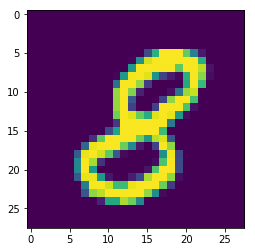

In [2]:
plt.imshow(mnist.train.images[5].reshape([28, 28]))
print(mnist.train.labels[5])

In [3]:
n_tr = mnist.train.images.shape[0]# number of training samples
n_ts = mnist.test.images.shape[0]#number of testing samples
n_pixel = mnist.train.images.shape[1]

In [4]:
#Create weights
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.01)
  return tf.Variable(initial, name='weights')

#Create biases
def bias_variable(shape):
  initial = tf.constant(0.01, shape=shape)
  return tf.Variable(initial, name='biases')

In [ ]:
#Convolutional function
def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')
#Max pool function
def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

In [5]:
def _get_variable(name,
                  shape,
                  initializer,
                  weight_decay=0.0,
                  dtype='float',
                  trainable=True):

    "A little wrapper around tf.get_variable to do weight decay and add to"

    "resnet collection"

    if weight_decay > 0:
        regularizer = tf.contrib.layers.l2_regularizer(weight_decay)
    else:
        regularizer = None
    collections = [tf.GraphKeys.VARIABLES, "batch_norm_variables"]
    return tf.get_variable(name,
                           shape=shape,
                           initializer=initializer,
                           dtype=dtype,
                           regularizer=regularizer,
                           collections=collections,
                           trainable=trainable)

In [ ]:
from tensorflow.python.training import moving_averages
from tensorflow.python.ops import control_flow_ops
def batch_normlization(x, is_training=True):
    x_shape = x.get_shape()
    params_shape = x_shape[-1:]
    axis = list(range(len(x_shape) - 1))
    beta = _get_variable('beta',
                         params_shape,
                         initializer=tf.zeros_initializer)
    gamma = _get_variable('gamma',
                          params_shape,
                          initializer=tf.ones_initializer)
    moving_mean = _get_variable('moving_mean',
                                params_shape,
                                initializer=tf.zeros_initializer,
                                trainable=False)
    moving_variance = _get_variable('moving_variance',
                                    params_shape,
                                    initializer=tf.ones_initializer,
                                    trainable=False)
    
    # These ops will only be preformed when training.

    mean, variance = tf.nn.moments(x, axis)

    update_moving_mean = moving_averages.assign_moving_average(moving_mean,
                                                               mean, 0.9997)
    update_moving_variance = moving_averages.assign_moving_average(

        moving_variance, variance, 0.9997)

    tf.add_to_collection("UPDATE_OPS_COLLECTION", update_moving_mean)

    tf.add_to_collection("UPDATE_OPS_COLLECTION", update_moving_variance)
    
    mean, variance = control_flow_ops.cond(1>0, lambda: (mean, variance),
                                           lambda: (moving_mean, moving_variance))
    x = tf.nn.batch_normalization(x, mean, variance, beta, gamma, 0.001)
    #x.set_shape(inputs.get_shape()) ??
    return x
